librosa version is  0.10.1
The length of the audio file is  196736
The y parameter is  [0.00283813 0.00314331 0.00305176 ... 0.00024414 0.00045776 0.00183105]
The sr parameter is  22050


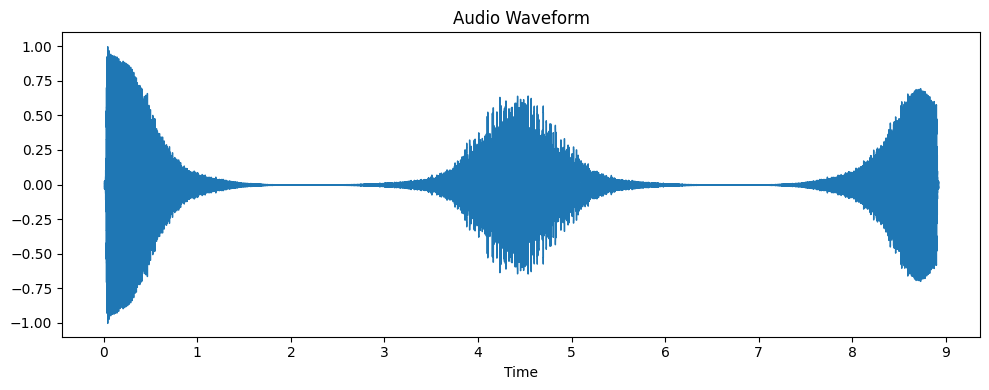

In [53]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf  # Import the soundfile library


# Load an audio file
print("librosa version is ",librosa.__version__)
audio_file = '/Volumes/Elements/GitHub/Sound_manipulation/semi_reflected_sample.aif'
y, sr = librosa.load(audio_file)
print("The length of the audio file is ",len(y))
print("The y parameter is ",y  )
print("The sr parameter is ",sr  )
# Display the waveformpip
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.tight_layout()
plt.show()

## This is the first markdown section

###This bit of code will find the central frequency of the sample.

In [54]:
# Compute the short-time Fourier transform (STFT)
stft = np.abs(librosa.stft(y))

# Get the frequencies corresponding to the STFT bins
fft_freqs = librosa.fft_frequencies(sr=sr)

# Find the bin with the highest energy
peak_bin = np.argmax(np.sum(stft, axis=1))

# Calculate the central frequency from the peak bin
central_freq = fft_freqs[peak_bin]

print("The central frequency is: {:.2f} Hz".format(central_freq))


The central frequency is: 64.60 Hz


# This bit of code will reflect the sample over a certain value that is a third higher than the samples (frequency*2^1/3)

The twelvth is  16394
The third is  65578
The length of y is  196736
The length of the new audio file is  196736
the freqs are  [ 0.          0.11207913  0.22415826 ... -0.33623739 -0.22415826
 -0.11207913]
The new_y frequency is: 10.77 Hz


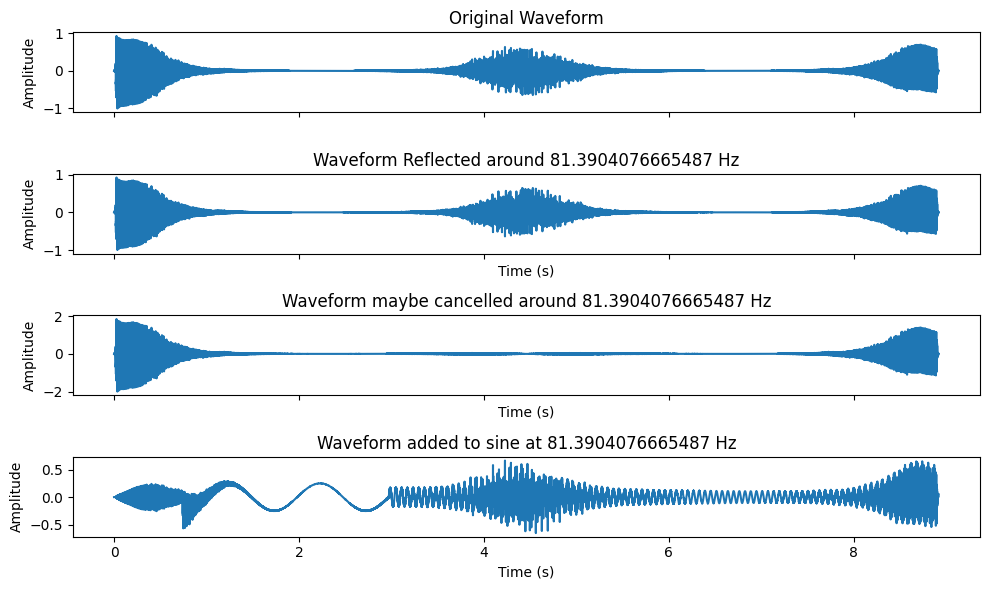

In [55]:
reflect_freq = central_freq*(pow(2,1/3))  # Hz

new_y = []

pi = np.pi
twelvth = np.floor(len(y)/12).astype(int)
third = np.floor(len(y)/3).astype(int)  
print("The twelvth is ",twelvth)
print("The third is ",third)
print("The length of y is ",len(y))
for i in range(twelvth):
    d = y[i] * 1.1*np.sin(2*pi*central_freq*i/(sr*256))*(1- np.exp(-i//sr))
    d = d  
    new_y.append(d)
for i in range( twelvth, third):
    d = y[i]+ 0.3*np.sin(2*pi*central_freq*i/(sr*64))
    d = d + y[i-32] + y[i-36]
    new_y.append(d)
for i in range( third, len(y)):
    d = y[i]+ 0.2*np.sin(2*pi*central_freq*i/(sr*4))*(np.exp(-(i-len(y)/3)/len(y)))
    d = d
    new_y.append(d)    
print("The length of the new audio file is ",len(new_y))  

# Compute the Fast Fourier Transform (FFT)
fft = np.fft.fft(y)

# Get the FFT frequencies
freqs = np.fft.fftfreq(len(y), 1/sr)
print("the freqs are ",freqs)

# Reflect the FFT around the specified frequency
reflected_fft = np.where(freqs >= reflect_freq, np.conj(fft) , np.conj(fft[::-1]))

# Compute the inverse FFT to get the reflected waveform
reflected_y = np.fft.ifft(reflected_fft).real

# Normalize the reflected waveform
reflected_y /= np.max(np.abs(reflected_y))

output_file = 'semi_reflected_sample.aif'
sf.write(output_file, reflected_y, sr, format='aiff')

output_file = 'alg_added.aif'
for i in range(len(new_y)):
    
    new_y[i] = new_y[i]/1.2
sf.write(output_file, new_y, sr, format='aiff')

dawg = y + np.fft.ifft(reflected_fft).real
dawgput_file = 'dawg_reflected_sample.aif'
sf.write(dawgput_file, dawg, sr, format='aiff')

# Plot the original and reflected waveforms
time = np.arange(len(y)) / sr


alg_added = '/Volumes/Elements/GitHub//Sound_manipulation/alg_added.aif'
# Compute the short-time Fourier transform (STFT)
alg_y, sr = librosa.load(alg_added)


stft = np.abs(librosa.stft(alg_y))

# Get the frequencies corresponding to the STFT bins
fft_freqs = librosa.fft_frequencies(sr=sr)

# Find the bin with the highest energy
peak_bin = np.argmax(np.sum(stft, axis=1))

# Calculate the central frequency from the peak bin
new_y_freq = fft_freqs[peak_bin]

print("The new_y frequency is: {:.2f} Hz".format(new_y_freq))


fig, ax = plt.subplots(nrows=4, figsize=(10, 6), sharex=True)

ax[0].plot(time, y)
ax[0].set_title('Original Waveform')
ax[0].set_ylabel('Amplitude')

ax[1].plot(time, reflected_y)
ax[1].set_title(f'Waveform Reflected around {reflect_freq} Hz')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')

ax[2].plot(time, dawg)
ax[2].set_title(f'Waveform maybe cancelled around {reflect_freq} Hz')
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Amplitude')

ax[3].plot(time, new_y)
ax[3].set_title(f'Waveform added to sine at {reflect_freq} Hz')
ax[3].set_xlabel('Time (s)')
ax[3].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

This code will reflect the frequencies in a way analgous to a geometric reflection. 

/Volumes/Elements/GitHub/Sound_manipulation/.notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/Volumes/Elements/GitHub/Sound_manipulation/.notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


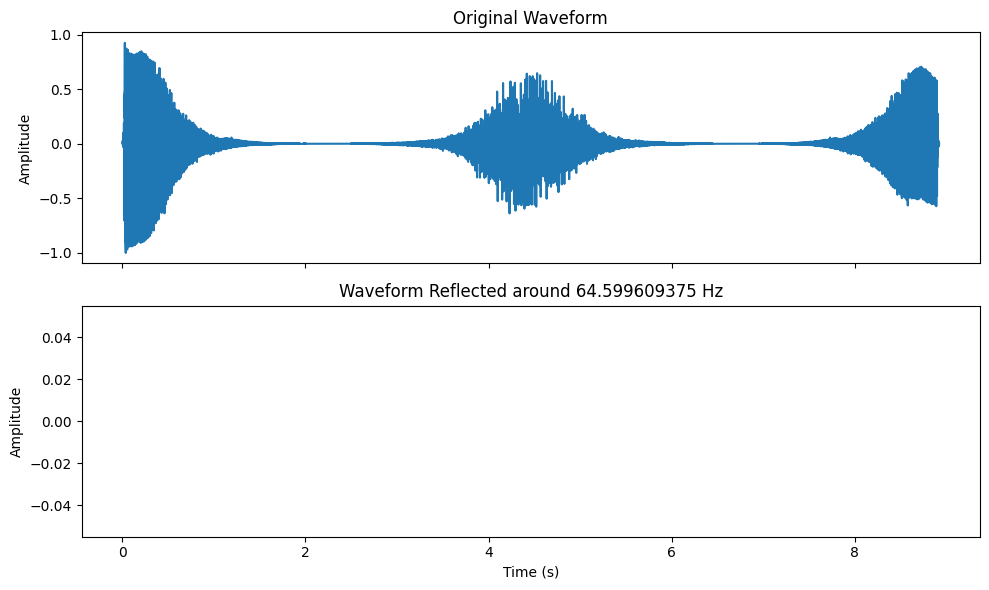

In [56]:

# Compute the Fast Fourier Transform (FFT)
reflect_freq = central_freq
y, sr = librosa.load(audio_file)
fft = np.fft.fft(y)

# Get the FFT frequencies
freqs = np.fft.fftfreq(len(y), 1/sr)

# Reflect the FFT around the specified frequency
reflected_fft = fft.copy()  # Create a copy to avoid modifying the original FFT
above_mask = freqs > reflect_freq
below_mask = freqs < reflect_freq

# Reflect and decrease frequencies above reflect_freq
reflected_fft[above_mask] = np.conj(fft[::-1])[above_mask]
reflected_fft[above_mask] *= (reflect_freq / freqs[above_mask])

# Raise frequencies below reflect_freq
reflected_fft[below_mask] = np.conj(fft[::-1])[below_mask]
reflected_fft[below_mask] *= (reflect_freq / freqs[below_mask])

# Compute the inverse FFT to get the reflected waveform
reflected_y = np.fft.ifft(reflected_fft).real

# Normalize the reflected waveform
reflected_y /= np.max(np.abs(reflected_y))

# Save the reflected waveform as an AIFF file
output_file = 'first_reflected_audio.aif'
sf.write(output_file, reflected_y, sr, format='aiff')

# Plot the original and reflected waveforms (optional)
time = np.arange(len(y)) / sr

fig, ax = plt.subplots(nrows=2, figsize=(10, 6), sharex=True)

ax[0].plot(time, y)
ax[0].set_title('Original Waveform')
ax[0].set_ylabel('Amplitude')

ax[1].plot(time, reflected_y)
ax[1].set_title(f'Waveform Reflected around {reflect_freq} Hz')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

#Now to re-write things into stereo

In [57]:

# Load the mono audio file
mono_audio, sr = librosa.load(audio_file, mono=True)

# Create a stereo array by duplicating the mono array
stereo_audio = np.tile(mono_audio, (2, 1)).T

output_file = 'stereo_output.aif'
# Write the stereo audio to a new file
sf.write(output_file, reflected_y, sr, format='aiff')

##Here's where we try some simple granular synthesis

In [58]:
import aifc
import numpy as np
from scipy.signal import get_window, resample

# Load AIFF audio file
audio_file = '/Volumes/Elements/GitHub/Sound_manipulation/semi_reflected_sample.aif'
aif = aifc.open(audio_file, 'r')
sample_rate = aif.getframerate()
n_frames = aif.getnframes()
audio_data = aif.readframes(n_frames)
audio_data = np.frombuffer(audio_data, dtype=np.int16)
aif.close()

# Define grain parameters
grain_duration = 0.1  # 100 milliseconds
grain_window = get_window('hanning', int(grain_duration * sample_rate))
pitch_shift_ratio = 1.5  # Increase pitch by 50%
num_grains = 100

# Initialize output signal
output_signal = np.zeros_like(audio_data, dtype=np.float64)  # Change dtype to float64

# Generate and overlap-add grains
for i in range(num_grains):
    # Extract grain
    start_idx = np.random.randint(0, len(audio_data) - len(grain_window))
    grain = audio_data[start_idx:start_idx + len(grain_window)] * grain_window

    # Pitch shift grain
    new_grain_length = int(len(grain) / pitch_shift_ratio)
    grain_resampled = resample(grain, new_grain_length)

    # Overlap-add grain to output signal
    start_idx = np.random.randint(0, len(output_signal) - len(grain_resampled))
    output_signal[start_idx:start_idx + len(grain_resampled)] += grain_resampled

# Normalize output signal
output_signal /= np.max(np.abs(output_signal))

output_file = 'output_granular.aif'
aif = aifc.open(output_file, 'w')
aif.setparams((2, 2, sample_rate, 0, b'NONE', b'not compressed'))  # Change 'not compressed' to b'not compressed'
aif.writeframes(output_signal.astype(np.int16).tobytes())
aif.close()